# Введение в алгоритмы и структуры данных (продолжение)

## Поиск по отсортированному массиву

- простой вариант - перебор - $ O(N) $
- бинарный поиск - $ log_2 (n) $

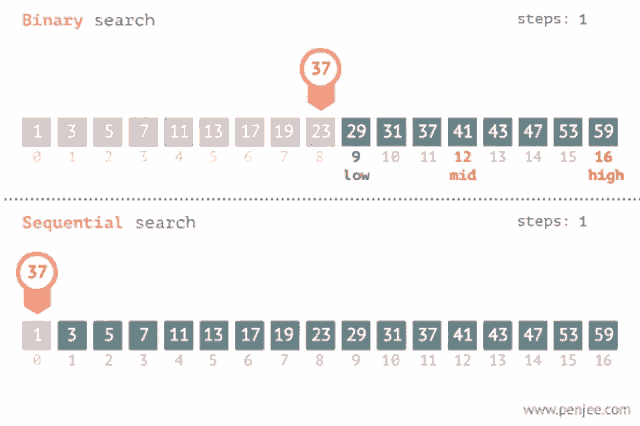

https://media.tenor.com/Jl0YrqxnHmAAAAAd/binary-search-sequence-search.gif

In [1]:
def binary_search(arr, target):
    left = 0
    right = len(arr) - 1
    
    while left <= right:
        mid = (left + right) // 2
        
        # Если значение в середине массива равно цели, возвращаем индекс
        if arr[mid] == target:
            return mid
        
        # Если значение в середине массива больше цели, обновляем правую границу
        elif arr[mid] > target:
            right = mid - 1
        
        # Если значение в середине массива меньше цели, обновляем левую границу
        else:
            left = mid + 1
    
    # Если элемент не найден, возвращаем -1
    return None

In [4]:
# Пример использования
arr = [2, 4, 6, 8, 10, 12, 14, 16]
target = 15

result = binary_search(arr, target)
print(result)

None


# Рекурсия

**Рекурсия** - это вызов функцией самой себя. В структурах данных полезно, когда одни и те же действия нужно повторить и для "родительского" узла, и для "дочерних" узлов, поскольку мы по умолчанию не знаем, какого размера дочерние СД там хранятся.

Чтобы понять рекурсию, нужно понять рекурсию.

# Двоичная куча 

**Двоичная куча** - это структура данных, позволяющая за логарифмическое время добавлять элементы и извлекать элемент с максимальным приоритетом (например, максимальный по значению).

Основное свойство кучи - это то, что *элементы по вертикали всегда упорядочены*. Порядок внутри одного уровня дерева не гарантируется.

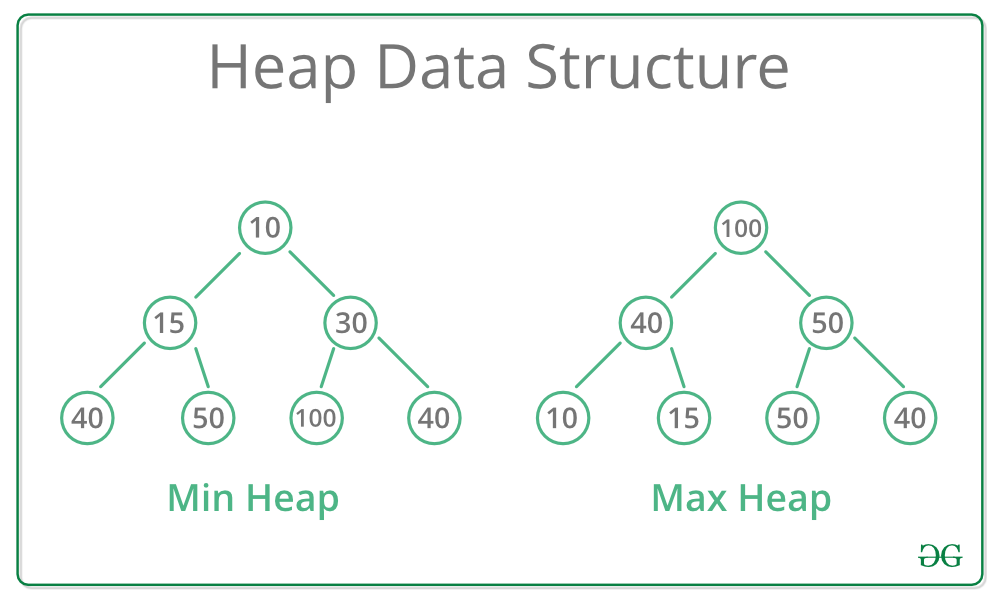

В этом уроке будем рассматривать ситуацию, когда приоритетом является само значение, содержащееся в узле кучи.

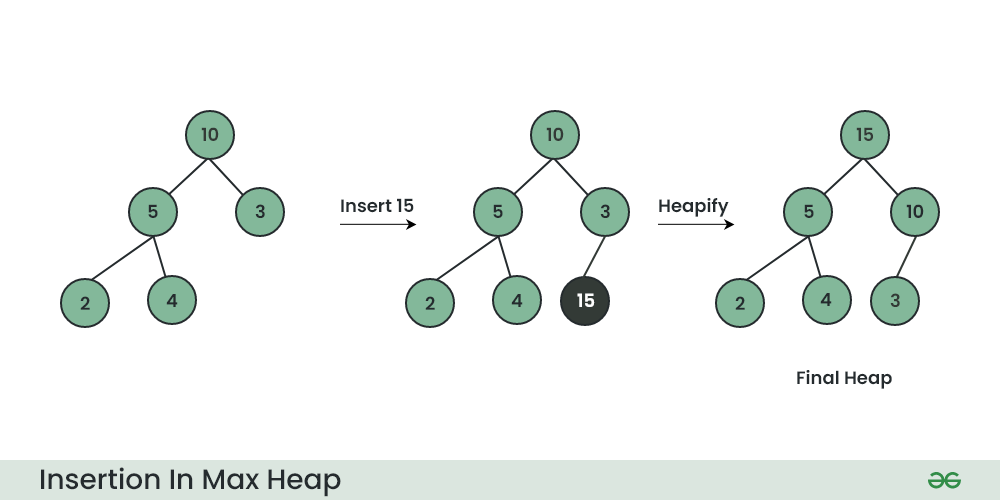

Будем рассматривать бинарную кучу, хранящуюся в списке по принципу "выше и левее - раньше в списке":
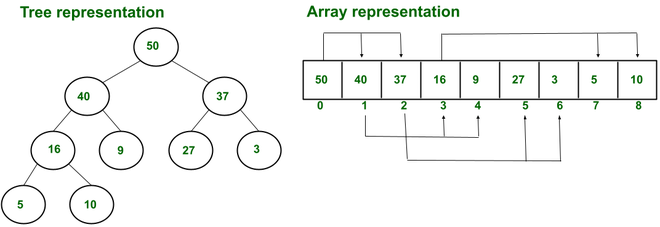

In [12]:
class MaxHeap:
    def __init__(self):
        """Инициализируем пустой список."""
        self._heap = []

    def parent(self, i):
        """Формула, по которой от текущего индекса можем получить родительский индекс."""
        return (i - 1) // 2

    def left_child(self, i):
        """Формула, по которой из текущего индекса получаем индекс левого дочернего элемента."""
        return 2 * i + 1

    def right_child(self, i):
        """Формула, по которой из текущего индекса получаем индекс правого дочернего элемента."""
        return 2 * i + 2
    
    def _heapify(self, i):
        """Самый важный метод кучи: восстановление правильного порядка элементов. Для некоторого элемента с
        индексом i сравниваем его с дочерними. Если какой-то из дочерних оказался больше, то меняем их местами.
        Идем рекурсивно от родительского элемента по дочерним. Считаем, что оба поддерева текущего элемента
        уже обладают свойством кучи
        """
        left = self.left_child(i)
        right = self.right_child(i)
        largest = i   # максимальный элемент должен быть выше остальных

        # из трех узлов кучи (текущий и оба дочерних) выбираем максимальный
        if left < len(self._heap) and self._heap[left] > self._heap[i]:
            largest = left
        if right < len(self._heap) and self._heap[right] > self._heap[largest]:
            largest = right

        # если текущий уже максимальный, значит куча построена уже верно
        if largest == i:
            return
        
        # иначе меняем местами значение родительского и максимального дочернего узлов, а дальше проводим то же самое
        # для того узла, который занял место дочернего
        self._heap[i], self._heap[largest] = self._heap[largest], self._heap[i]
        self._heapify(largest)

    def insert_key(self, key):
        """Вставка нового значения подразумевает перестройку кучи."""
        self._heap.append(key)       # добавляем новый элемент в конец кучи
        i = len(self._heap) - 1      # и меняем его местами с родительскими, пока он не встанет на нужное место
        while i >= 0:
            self._heapify(i)
            i = self.parent(i)

    def extract_max(self):
        """Получение максимального элемента - это взятие верхнего элемента из кучи. А затем на его место
        переставляется самый последний элемент (один из самых маленьких) и производится рекурсивная нормализация
        кучи методом _heapify.
        """
        if len(self._heap) == 0:
            raise ValueError("Куча пустая")
        if len(self._heap) == 1:
            return self._heap.pop()

        root = self._heap[0]
        self._heap[0] = self._heap.pop()
        self._heapify(0)

        return root
    
    def __len__(self):
        """Получить текущий размер кучи (равен длине списка, в котором она хранится)."""
        return len(self._heap)

In [14]:
heap = MaxHeap()

heap.insert_key(10)
heap.insert_key(14)
heap.insert_key(11)
heap.insert_key(12)
heap.insert_key(13)
heap.insert_key(15)


heap._heap

[15, 13, 14, 10, 12, 11]

In [15]:
heap.extract_max()

15

In [16]:
heap._heap

[14, 13, 11, 10, 12]

### Построение кучи из списка

Здесь всё очень просто: берем неотсортированный список и добавляем по очереди все его элементы в кучу. Таким образом, мы $ N $ раз выполняем операцию вставки в кучу, которая занимает $ log_2 N $ времени, и общая оценка времени построения кучи в этом случае:

$$ T(N) = O(N log_2 N) $$

Но кучу на списке можно построить еще быстрее - за **линейное** время. Фишка в том, что `heapify` достаточно вызвать только для всех вершин, у которых есть хотя бы один потомок, так как поддеревья, состоящие из одной вершины без потомков, уже упорядочены. Потомки гарантированно есть у первых `len(heap) / 2` вершин.

In [17]:
class MaxHeapArray(MaxHeap):
    
    @classmethod
    def from_array(cls, arr: list) -> "MaxHeapArray":
        heap = cls()
        heap._heap = arr.copy()
        for i in range(len(heap) // 2, -1, -1):
            heap._heapify(i)
        return heap

In [19]:
heap = MaxHeapArray.from_array([14, 12, 10, 11, 13, 15])
heap._heap

[15, 13, 14, 11, 12, 10]

# Сортировка HeapSort

В прошлом уроке мы рассмотрели сортировку пузырьком, которая выполняется за квадратичное время. Используя кучу, можно сортировать списки быстрее. Сложность по времени такой сортировки будет складываться из двух этапов сортировки:

1. Собираем кучу - $ O(N) $
2. Извлекаем поочередно каждый первый элемент кучи - $ O(N log_2 N) $

Поскольку в этом блокноте мы уже описали кучу, которая в вершине держит максимальный элемент, то будем проводить сортировку от большего к меньшему. Если нужно отсортировать список от меньшего к большему, то можно либо просто "развернуть" полученный после сортировки список, либо описать MinHeap вместо MaxHeap.

Общая сложность, полученная из обоих этапов, получается:

$$ O(N) + O(N log_2 N) = O(N log_2 N), $$ поскольку $$ f(N) = N <= g(N) = N log_2 N, \forall N >= 1 $$

In [22]:
def heap_sort(array: list) -> list:
    heap = MaxHeapArray.from_array(array)
    return [heap.extract_max() for _ in range(len(heap))]


heap_sort([4, 2, 7, 4, 9, 1, 3])

[9, 7, 4, 4, 3, 2, 1]

Сравним реальное время выполнения с сортировкой пузырьком из предыдущего урока.

In [23]:
# вспомогательная функция, которая меняет местами элементы списка с индексами pos1 и pos2
def _swap(lst: list, pos1: int, pos2: int):
    lst[pos1], lst[pos2] = lst[pos2], lst[pos1]

    
# функция, которая реализует пузырьковую сортировку внутри уже определенного списка
def bubble_sort(lst: list):
    for i in range(len(lst)):            # первый проход по всему списку - n итераций, т.е. O(n)
        for j in range(i, len(lst)):     # вложенный проход по всему списку - n-i итераций, т.е. O(n)
            if lst[i] > lst[j]:          # i всегда < j. Если левый элемент больше правого, меняем их местами
                _swap(lst, i, j)

In [24]:
import random

array = [random.randint(1, 10000) for _ in range(10000)]
array2 = array.copy()

array

[1162,
 821,
 8704,
 5033,
 7522,
 9649,
 3638,
 3335,
 1681,
 200,
 9852,
 8618,
 1060,
 6460,
 2307,
 655,
 6846,
 9668,
 8649,
 9568,
 4632,
 6775,
 2017,
 5859,
 8524,
 5021,
 2993,
 4078,
 9830,
 8145,
 7284,
 5278,
 4677,
 4157,
 2870,
 8568,
 6273,
 4012,
 3248,
 7615,
 5852,
 9089,
 1352,
 5240,
 5750,
 4946,
 5803,
 4522,
 3676,
 1879,
 3448,
 3060,
 6234,
 9054,
 7907,
 1519,
 4313,
 159,
 2842,
 5903,
 2418,
 1918,
 9209,
 8789,
 6902,
 5817,
 2739,
 9566,
 3336,
 8799,
 6708,
 1410,
 9797,
 2489,
 3119,
 454,
 1339,
 8502,
 3881,
 4694,
 6670,
 201,
 9789,
 4121,
 1913,
 9393,
 43,
 2234,
 9060,
 6392,
 2967,
 3655,
 4017,
 453,
 9752,
 4905,
 9207,
 8781,
 9019,
 9488,
 7813,
 7155,
 7657,
 1844,
 4836,
 1804,
 7975,
 2963,
 3324,
 3078,
 2719,
 4549,
 2705,
 1849,
 2281,
 410,
 3195,
 5636,
 2881,
 4732,
 7589,
 3217,
 2890,
 9661,
 1798,
 4642,
 2193,
 9500,
 1457,
 3553,
 460,
 6082,
 5343,
 6289,
 1626,
 8844,
 7514,
 1916,
 4243,
 8446,
 247,
 4929,
 3325,
 8746,
 146

In [25]:
%%time

bubble_sort(array)

CPU times: user 6.18 s, sys: 159 ms, total: 6.34 s
Wall time: 6.6 s


In [26]:
%%time

res = heap_sort(array2)

CPU times: user 123 ms, sys: 5.66 ms, total: 128 ms
Wall time: 132 ms


In [27]:
array

[2,
 4,
 4,
 7,
 8,
 8,
 8,
 8,
 9,
 9,
 10,
 10,
 10,
 15,
 16,
 17,
 17,
 18,
 19,
 20,
 20,
 20,
 21,
 23,
 23,
 23,
 25,
 25,
 26,
 26,
 29,
 29,
 29,
 30,
 30,
 38,
 38,
 39,
 39,
 41,
 41,
 43,
 43,
 44,
 44,
 45,
 46,
 47,
 48,
 51,
 51,
 52,
 52,
 54,
 55,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 63,
 64,
 66,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 73,
 75,
 75,
 76,
 77,
 78,
 78,
 80,
 82,
 82,
 83,
 86,
 86,
 86,
 87,
 87,
 88,
 88,
 88,
 88,
 91,
 92,
 92,
 92,
 92,
 93,
 93,
 94,
 94,
 95,
 95,
 96,
 96,
 96,
 98,
 99,
 99,
 100,
 102,
 102,
 102,
 102,
 103,
 103,
 103,
 103,
 104,
 105,
 105,
 109,
 110,
 111,
 111,
 111,
 112,
 112,
 113,
 113,
 113,
 113,
 114,
 114,
 115,
 117,
 117,
 118,
 118,
 119,
 120,
 122,
 123,
 123,
 124,
 126,
 126,
 127,
 128,
 129,
 130,
 130,
 131,
 133,
 136,
 136,
 138,
 138,
 139,
 142,
 142,
 143,
 144,
 145,
 145,
 146,
 146,
 146,
 147,
 149,
 150,
 150,
 150,
 153,
 154,
 154,
 156,
 156,
 157,
 157,
 158,
 159,
 159,
 162,
 163,
 164

In [28]:
res

[10000,
 10000,
 9999,
 9998,
 9996,
 9995,
 9995,
 9994,
 9993,
 9993,
 9993,
 9991,
 9990,
 9989,
 9988,
 9988,
 9987,
 9986,
 9986,
 9985,
 9985,
 9985,
 9981,
 9978,
 9976,
 9976,
 9976,
 9976,
 9976,
 9976,
 9974,
 9972,
 9972,
 9971,
 9971,
 9969,
 9969,
 9966,
 9965,
 9964,
 9964,
 9963,
 9963,
 9961,
 9958,
 9957,
 9954,
 9952,
 9950,
 9950,
 9949,
 9947,
 9947,
 9947,
 9945,
 9945,
 9943,
 9942,
 9940,
 9940,
 9940,
 9938,
 9938,
 9938,
 9935,
 9934,
 9933,
 9932,
 9932,
 9931,
 9930,
 9930,
 9924,
 9924,
 9923,
 9922,
 9921,
 9921,
 9919,
 9919,
 9918,
 9917,
 9913,
 9913,
 9912,
 9912,
 9911,
 9910,
 9910,
 9910,
 9909,
 9909,
 9907,
 9907,
 9905,
 9905,
 9905,
 9904,
 9904,
 9902,
 9901,
 9899,
 9896,
 9895,
 9895,
 9893,
 9893,
 9893,
 9893,
 9891,
 9891,
 9890,
 9886,
 9886,
 9884,
 9883,
 9883,
 9882,
 9881,
 9878,
 9878,
 9878,
 9877,
 9877,
 9874,
 9873,
 9873,
 9873,
 9871,
 9869,
 9868,
 9867,
 9867,
 9865,
 9863,
 9861,
 9860,
 9859,
 9859,
 9858,
 9856,
 9854,
 985

Автор этого материала сам охренел от прироста в производительности при использовании логарифма вместо квадрата.

Кстати, в стандартной библиотеке питона есть модуль, который позволяет работать со списками так, как будто внутри хранится бинарная куча:

In [29]:
from heapq import heappush, heappop, heapify

arr = [2, 5, 3]
heappush(arr, 4)
arr

[2, 4, 3, 5]

In [30]:
heappush(arr, 1)
arr

[1, 2, 3, 5, 4]

# Двоичное дерево поиска

Куча - не оптимальная структура для поиска элемента, поскольку в среднем всё равно придется просматривать все элементы кучи, ибо мы не знаем их точный порядок. Давайте попробуем "повернуть" дерево так, чтобы наверху теперь был не максимальный или минимальный элемент, а будем строить его по такому принципу, чтобы в левом дочернем узле любого узла всегда был элемент меньше его, а в правом - больше. Тогда при поиске элемента мы точно будем знать, в какую сторону двигаться, и в среднем поиск займет

$$ T(N) = O(log_2 N) $$

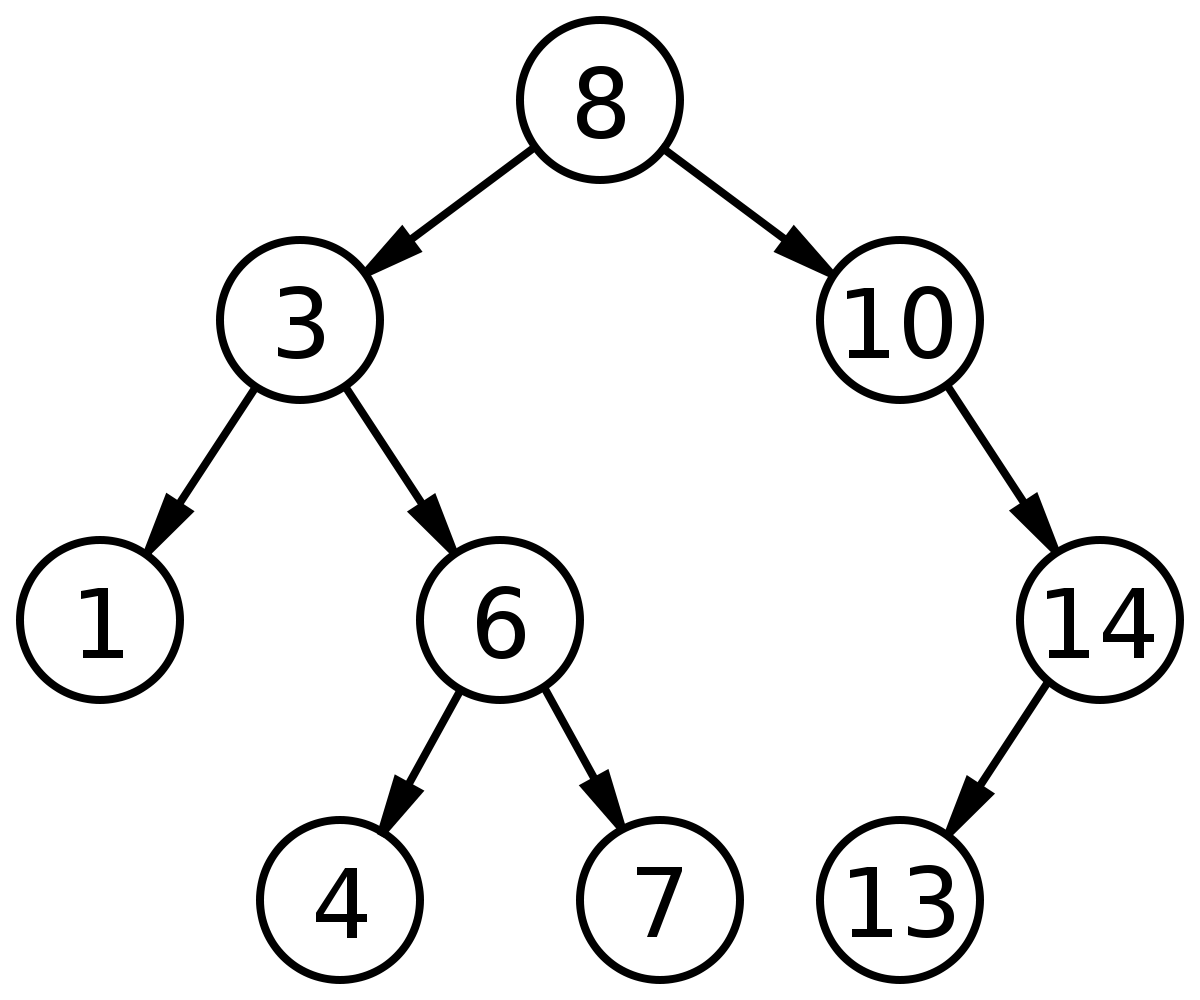

Отличия от обычного бинарного дерева:


- Все узлы левого поддерева меньше корневого узла.
- Все узлы правого поддерева больше корневого узла.
- Оба поддерева каждого узла тоже являются деревьями двоичного поиска, т. е. также обладают первыми двумя свойствами. 


In [31]:
class TreeNode:
    """Класс - узел дерева."""
    def __init__(self, key):
        self.key = key         # храним значение, а также ссылки на левый и правый дочерние узлы
        self.left = None
        self.right = None

class BinarySearchTree:
    """Класс - дерево."""
    def __init__(self):
        """При инициализации корневого узла у нас пока нет - дерево пустое."""
        self.root = None

    def insert(self, key):
        """Публичный интерфейс вставки элемента запускает рекурсивную процедуру, поскольку нужно найти
        правильное место для нового значения.
        """
        self.root = self._insert_recursive(self.root, key)

    def _insert_recursive(self, root, key):
        """Рекурсивная вставка элемента."""
        if not root:
            return TreeNode(key)          # если дерево пустое, то просто создаем новый корневой узел
        if key < root.key:
            root.left = self._insert_recursive(root.left, key)   # а если нет - рекурсивно движемся вправо 
        elif key > root.key:                                     # или влево на каждом этапе, в зависимости от
            root.right = self._insert_recursive(root.right, key) # того, больше новый элемент текущего или меньше
        return root

    def search(self, key):
        """Поиск работает так же, как вставка, только без вставки."""
        return self._search_recursive(self.root, key)

    def _search_recursive(self, root, key):
        """Рекурсивный поиск. Если дерево пустое - вернем None."""
        if not root or root.key == key:
            return root
        if key < root.key:  # если искомое значение меньше текущего узла, идем в левое поддерево, иначе в правое
            return self._search_recursive(root.left, key)
        return self._search_recursive(root.right, key)

    def inorder_traversal(self):
        """Конвертация дерева в список, чтобы было удобно выводить на экран."""
        result = []
        self._inorder_recursive(self.root, result)
        return result

    def _inorder_recursive(self, root, result):
        """Конвертация в список тоже требует рекурсию."""
        if root:
            self._inorder_recursive(root.left, result)
            result.append(root.key)
            self._inorder_recursive(root.right, result)
            
    def delete(self, key):
        """Удаление элемента тоже требует рекурсивного поиска."""
        self.root = self._delete_recursive(self.root, key)

    def _delete_recursive(self, root, key):
        """Рекурсивное удаление."""
        if not root:
            return None    # если дерево пустое - удалять нечего. Сюда же придем и если элемента нет

        if key < root.key:
            root.left = self._delete_recursive(root.left, key)    # поиск влево-вправо - мы уже разобрали
        elif key > root.key:
            root.right = self._delete_recursive(root.right, key)
        else:    # эта ветка выполняется тогда, когда нужный элемент найден
            if not root.left:
                return root.right  # удаляя элемент, мы должны вписать новое поддерево в его родительский
            elif not root.right:   # элемент. Если хотя бы одного из дочерних элементов нет - возвращаем второй
                return root.left   # (ну или None, если нет обоих дочерних элементов)

            temp = self._find_min(root.right)  # а если оба дочерних есть - заменяем удаляемый элемент на 
            root.key = temp.key                # следующий за ним по возрастанию (самый нижний левый у правого
                                               # дочернего узла), а сам тот узел удаляем не думая
            root.right = self._delete_recursive(root.right, temp.key)

        return root

    def _find_min(self, root):
        """Функция для поиска минимального элемента в поддереве."""
        current = root
        while current.left:
            current = current.left
        return current

In [32]:
bst = BinarySearchTree()
keys = [5, 3, 7, 2, 4, 6, 8]

for key in keys:
    bst.insert(key)

print("Обычное двоичное дерево поиска (in-order traversal):", bst.inorder_traversal())

# Пример поиска элемента
search_key = 4
result = bst.search(search_key)
if result:
    print(f"Ключ {search_key} найден в дереве.")
else:
    print(f"Ключ {search_key} не найден в дереве.")

delete_key = 3
bst.delete(delete_key)

print(f"После удаления {delete_key}:", bst.inorder_traversal())

Обычное двоичное дерево поиска (in-order traversal): [2, 3, 4, 5, 6, 7, 8]
Ключ 4 найден в дереве.
После удаления 3: [2, 4, 5, 6, 7, 8]


Можно заметить, что при неудачном изначальном наборе значений сложность поиска по дереву всё равно будет $ O(N) $, например, когда мы добавляем элементы в него строго в порядке возрастания. Поэтому были придуманы разные оптимизации, которые не дают дереву разрастись только в одну сторону. Самыми известными из них являются **AVL-деревья**, в которых разница между глубиной поддеревьев может быть не больше 1, и **красно-черные деревья**, где отслеживается отношение длин поддеревьев.

In [ ]:
class TreeNode:
    """В узле дерева теперь хранится и глубина поддерева."""
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

        
class AVLTree:
    def __init__(self):
        self.root = None

    def height(self, node):
        """Возвращает высоту узла."""
        if not node:
            return 0
        return node.height

    def update_height(self, node):
        """Обновляет высоту узла."""
        if not node:
            return 0
        node.height = 1 + max(self.height(node.left), self.height(node.right))

    def balance_factor(self, node):
        """Вычисляет балансировочный фактор узла."""
        if not node:
            return 0
        return self.height(node.left) - self.height(node.right)

    def rotate_right(self, y):
        """Поворот узла вправо."""
        x = y.left
        T2 = x.right

        x.right = y
        y.left = T2

        self.update_height(y)
        self.update_height(x)

        return x

    def rotate_left(self, x):
        """Поворот узла влево."""
        y = x.right
        T2 = y.left

        y.left = x
        x.right = T2

        self.update_height(x)
        self.update_height(y)

        return y

    def balance(self, node):
        """Балансировка узла."""
        if not node:
            return node

        self.update_height(node)

        balance = self.balance_factor(node)

        if balance > 1:
            if self.balance_factor(node.left) < 0:
                node.left = self.rotate_left(node.left)
            return self.rotate_right(node)

        if balance < -1:
            if self.balance_factor(node.right) > 0:
                node.right = self.rotate_right(node.right)
            return self.rotate_left(node)

        return node

    def insert(self, key):
        """Вставляет новый ключ в дерево."""
        self.root = self._insert_recursive(self.root, key)

    def _insert_recursive(self, root, key):
        """Рекурсивная вставка ключа."""
        if not root:
            return TreeNode(key)

        if key < root.key:
            root.left = self._insert_recursive(root.left, key)
        elif key > root.key:
            root.right = self._insert_recursive(root.right, key)
        else:
            return root

        return self.balance(root)

    def inorder_traversal(self):
        """Выполняет обход дерева в порядке inorder."""
        result = []
        self._inorder_recursive(self.root, result)
        return result

    def _inorder_recursive(self, root, result):
        """Рекурсивный обход дерева в порядке inorder."""
        if root:
            self._inorder_recursive(root.left, result)
            result.append(root.key)
            self._inorder_recursive(root.right, result)

# Быстрая сортировка

Рекурсия применяется не только при работе с деревянными структурами данных, но и при реализации некоротых алгоритмов сортировки. Например, быстрая сортировка рекурсивно сортирует подмассивы данных, разделяя исходный массив на два в зависимости от значения последнего элемента.

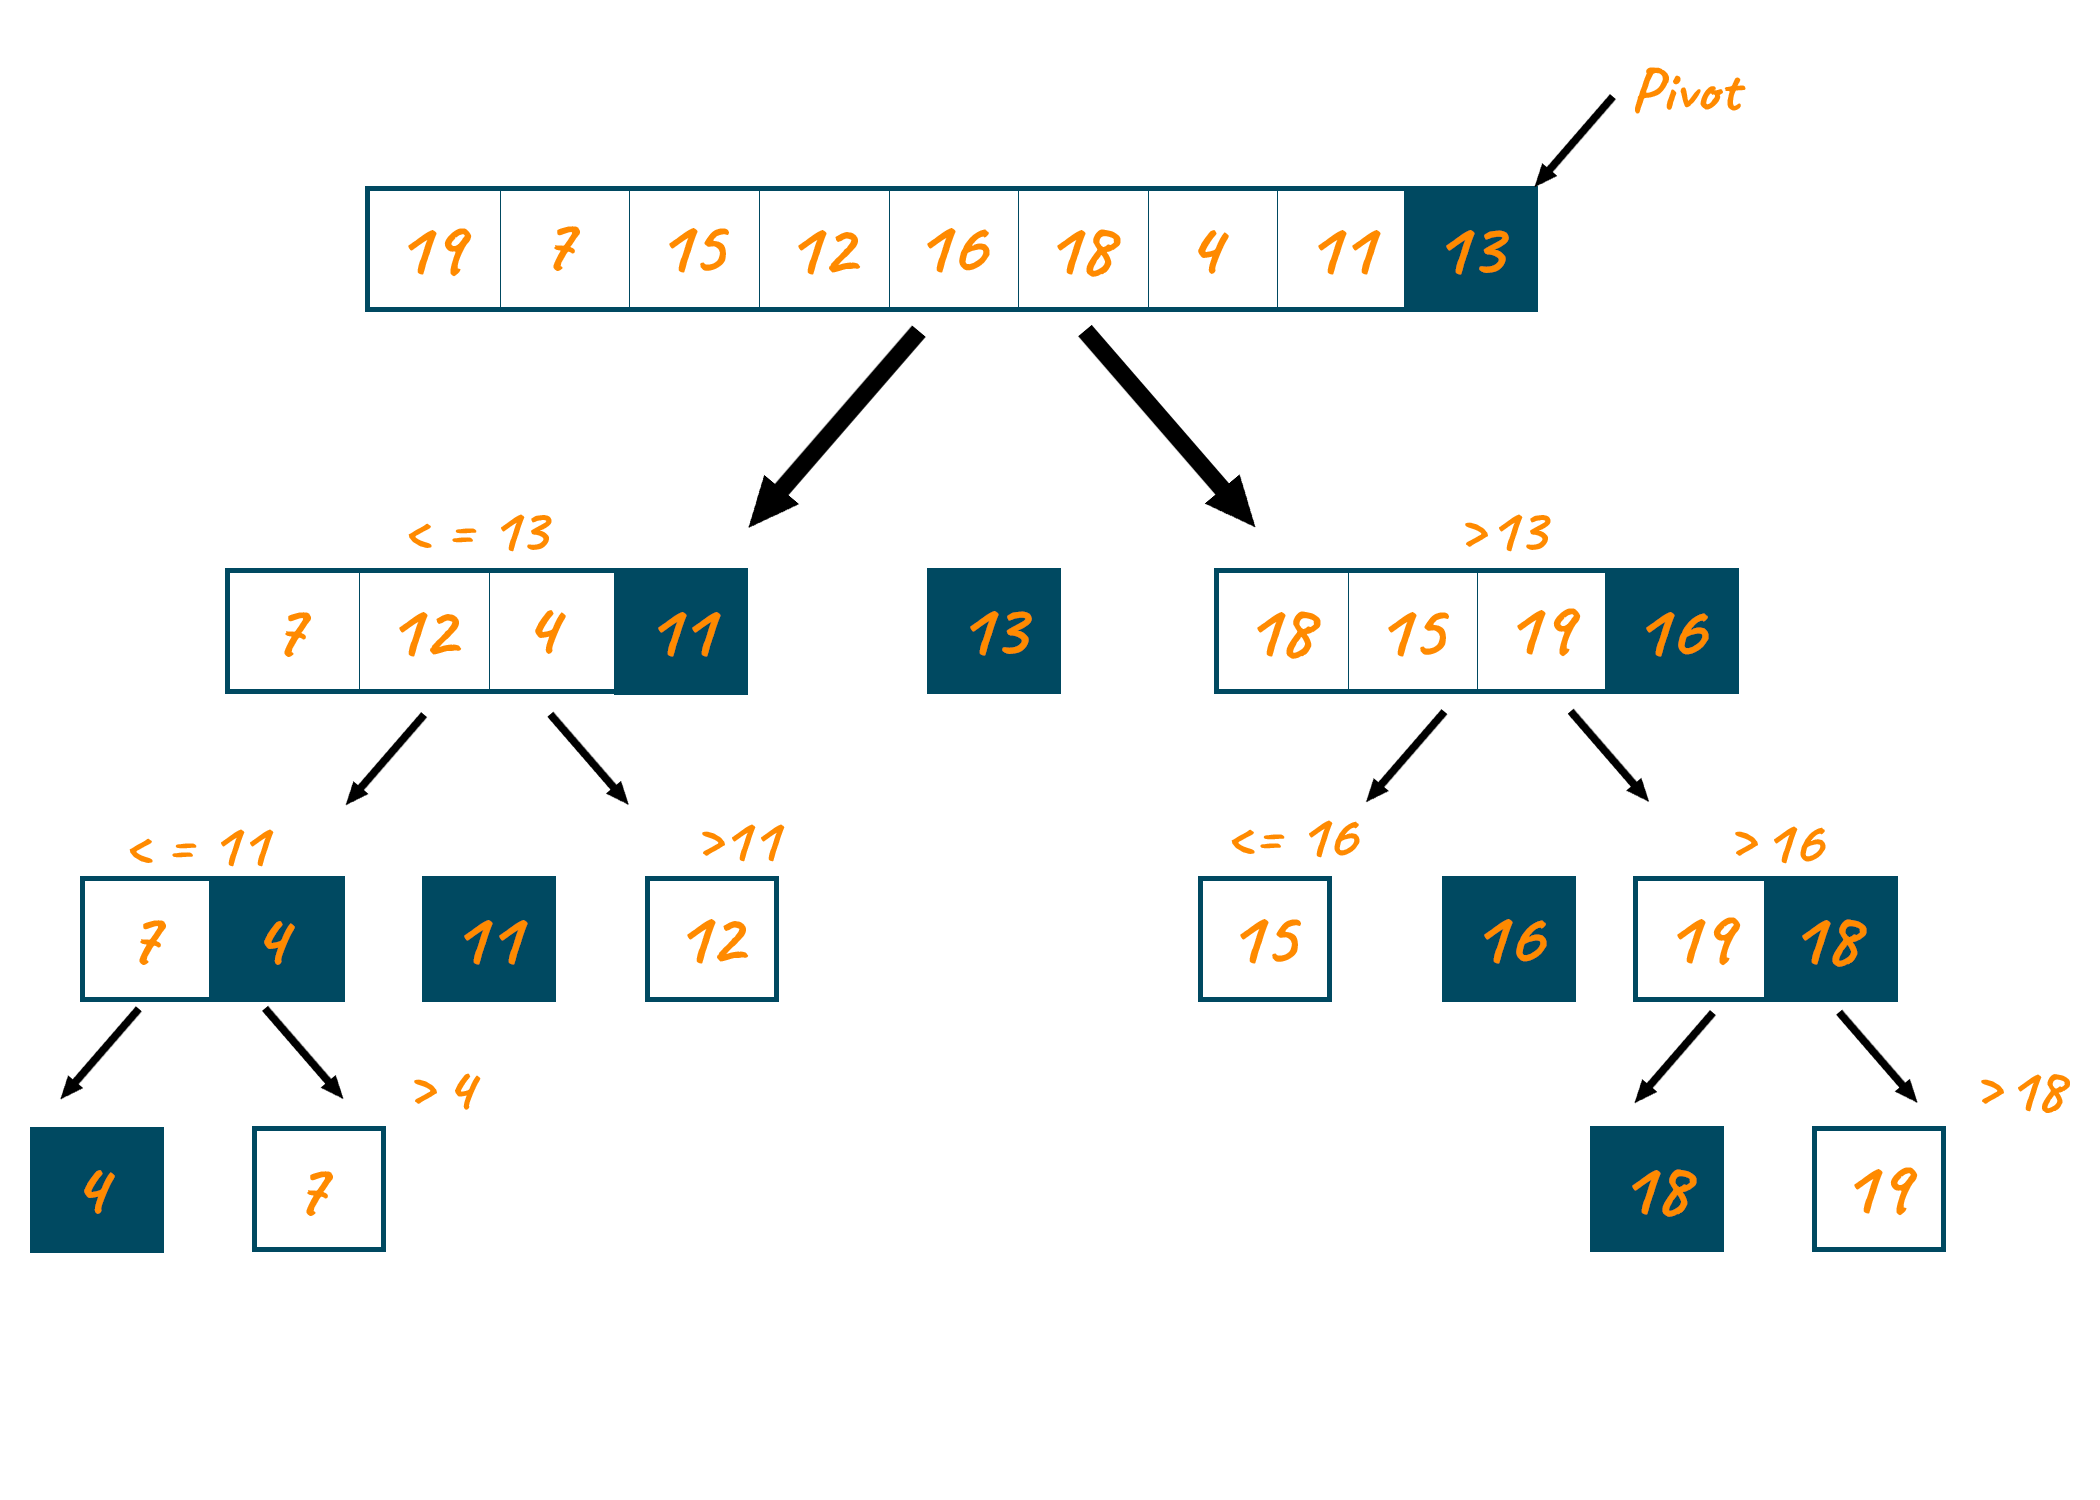

In [44]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr.pop()
    left = [x for x in arr if x <= pivot]
    middle = [pivot]
    right = [x for x in arr if x > pivot]
    
    return quick_sort(left) + middle + quick_sort(right)

In [45]:
arr = [3, 6, 8, 10, 1, 2, 1]
print("Исходный массив:", arr)
sorted_arr = quick_sort(arr)
print("Отсортированный массив (QuickSort):", sorted_arr)

Исходный массив: [3, 6, 8, 10, 1, 2, 1]
Отсортированный массив (QuickSort): [1, 1, 2, 3, 6, 8, 10]


# Сортировка слиянием

Еще одна рекурсивная сортировка практически с той же идеей, как и у быстрой сортировки, только массив мы здесь делим не по значению пивота, а просто пополам. Делим подмассивы до тех пор, пока они не станут длины 1, а затем сливаем, как будто они отсортированы: просто итеративно выбираем наименьшее значение среди двух текущих начал массивов.

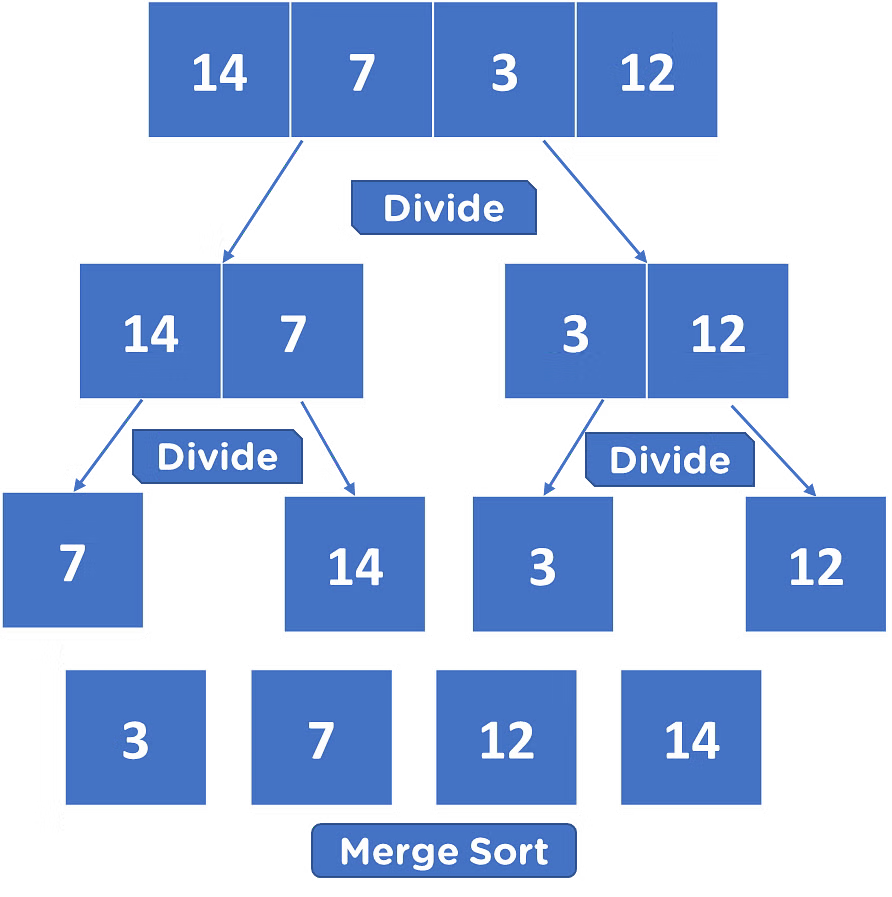

In [48]:
def merge_sort(arr):
    if len(arr) <= 1:
        return
    
    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    print(" " * (6 - len(arr)), "Сортируем левый подмассив", left_half)
    merge_sort(left_half)
    print(" " * (6 - len(arr)), "Отсортировали левый подмассив:", left_half)

    print(" " * (6 - len(arr)), "Сортируем правый подмассив", right_half)
    merge_sort(right_half)
    print(" " * (6 - len(arr)), "Отсортировали правый подмассив:", right_half)

    i = j = k = 0

    while i < len(left_half) and j < len(right_half):
        if left_half[i] < right_half[j]:
            arr[k] = left_half[i]
            i += 1
        else:
            arr[k] = right_half[j]
            j += 1
        k += 1

    while i < len(left_half):
        arr[k] = left_half[i]
        i += 1
        k += 1

    while j < len(right_half):
        arr[k] = right_half[j]
        j += 1
        k += 1

In [49]:
arr = [14, 7, 3, 12]
print("Исходный массив:", arr)
merge_sort(arr)
print("Отсортированный массив (Merge Sort):", arr)


Исходный массив: [14, 7, 3, 12]
   Сортируем левый подмассив [14, 7]
     Сортируем левый подмассив [14]
     Отсортировали левый подмассив: [14]
     Сортируем правый подмассив [7]
     Отсортировали правый подмассив: [7]
   Отсортировали левый подмассив: [7, 14]
   Сортируем правый подмассив [3, 12]
     Сортируем левый подмассив [3]
     Отсортировали левый подмассив: [3]
     Сортируем правый подмассив [12]
     Отсортировали правый подмассив: [12]
   Отсортировали правый подмассив: [3, 12]
Отсортированный массив (Merge Sort): [3, 7, 12, 14]


## Сравнение сортировок

Сравним изученные сортировки по времени на случайном списке.

In [50]:
import random

array = [random.randint(1, 100000) for _ in range(100000)]
array2 = array.copy()
array3 = array.copy()

In [51]:
%%time

res = heap_sort(array)

CPU times: user 1.47 s, sys: 36.9 ms, total: 1.51 s
Wall time: 1.56 s


In [52]:
%%time

res = quick_sort(array2)

CPU times: user 227 ms, sys: 10.3 ms, total: 237 ms
Wall time: 247 ms


In [53]:
# уберем принты, чтобы они не занимали время эксперимента
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

In [54]:
%%time

res = merge_sort(array3)

CPU times: user 444 ms, sys: 18.2 ms, total: 463 ms
Wall time: 492 ms


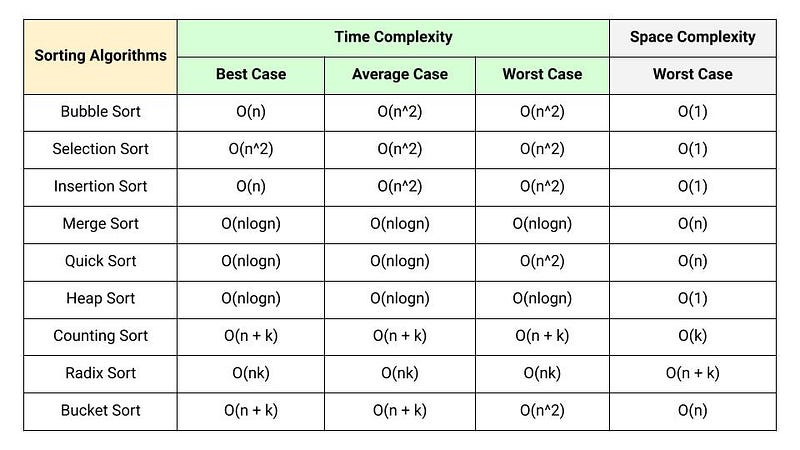

## Сортировка вставками

Чтобы лучше понимать, как устроен питон, разберем еще одну неоптимальную сортировку - сортировку вставками с квадратичной сложностью. Суть в том, что мы проходимся по массиву и на каждом шаге сравниваем текущий элемент со всеми, которые стоят левее его, и вставляем его на нужное место, двигая остальные элементы правее.

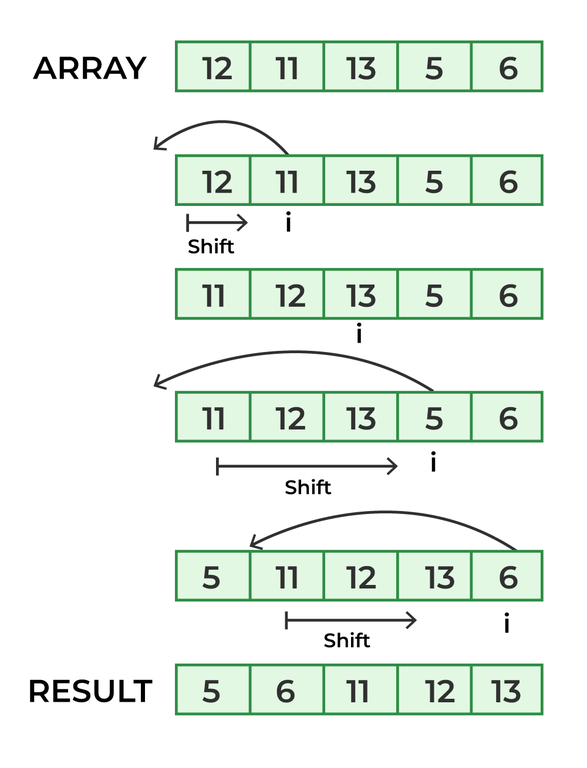

In [55]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        
        arr[j + 1] = key

In [56]:
arr = [3, 6, 8, 10, 1, 2, 1]
print("Исходный массив:", arr)
insertion_sort(arr)
print("Отсортированный массив (Insertion Sort):", arr)

Исходный массив: [3, 6, 8, 10, 1, 2, 1]
Отсортированный массив (Insertion Sort): [1, 1, 2, 3, 6, 8, 10]


Такая сортировка, естественно, плохо работает на случайных больших массивах. Но в реальной жизни в случайной последовательности очень часто встречаются отсортированные подпоследовательности, для которых этот алгоритм хорош. Поэтому в питоне используют алгоритм **TimSort**, который сочетает сортировку слиянием (пока массив еще большой) и сортировку вставками для маленьких подпоследовательностей, чтобы производить меньше слияний.

## Сортировка подсчетом

Подходит для списков, в которых много повторяющихся значений. В прошлом уроке мы рассмотрели ее классический вариант для списков, а теперь опишем более пионизированную версию для универсальных данных:

In [57]:
def counting_sort(array: list) -> list:
    counts = {}
    for value in array:
        counts[value] = counts.get(value, 0) + 1    # O(N)
    result = []
    for key in sorted(counts):                      # O(K log K), где K - размер множества значений исходного списка
        result.extend([key] * counts[key])          # O(N)
    return result                                   # Итого: O(N + K log K)

In [58]:
array = [5, 5, 3, 3, 3, 3, 3, 5, 5, 6, 7, 7, 5, 5, 5, 3, 2, 5, 6, 7, 1]
counting_sort(array)

[1, 2, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7]

Здесь мы использовали словарь, который позволяет добавлять, получать и удалять элементы по уникальному ключу за $ O(1) $, т.е. за константное время. Ниже разберемся, как у него это получается.

# Хеш-таблицы

## Хеш-функция

**Хеш-функция** — это *детерминированная* функция, которая принимает входные данные переменной длины и преобразует их в фиксированный размерный набор битов, обычно меньшего размера (можно считать, что в число). Результат такой функции называется хешем или хеш-значением. Основная цель хеш-функции — это выполнение быстрого и эффективного отображения большого объема данных в небольшое фиксированное значение, которое служит в качестве «отпечатка» или «суммаризации» исходных данных.

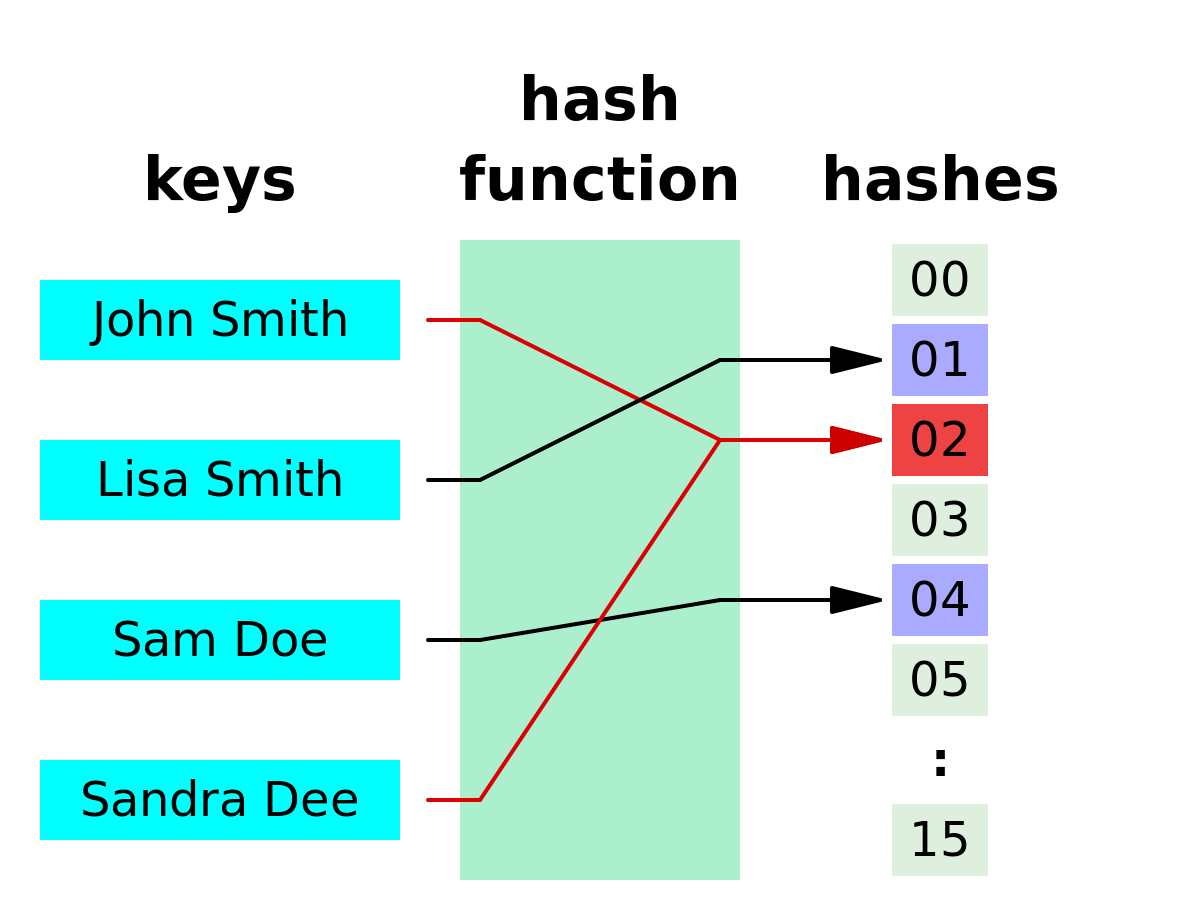

### Применения хеш-функций

1. **Хеш-таблицы и поиск данных**. Одно из наиболее распространенных применений хеш-функций. Они используются для реализации ассоциативных массивов или словарей, где данные хранятся в виде ключей и связанных с ними значений. Хеш-функция преобразует ключи в индексы массива для быстрого доступа к значениям.

2. **Цифровые подписи и контрольные суммы**. Хеш-функции используются для создания уникальных отпечатков для файлов или сообщений. Любое изменение в исходных данных приведет к изменению хеш-значения, что делает их полезными для обнаружения целостности данных или подтверждения подлинности.

3. **Шифрование**. Они также используются в криптографии для создания хешей паролей или сообщений, что делает их более безопасными для хранения и передачи данных.

In [69]:
hash(1234)

1234

In [70]:
hash(1244)

1244

In [71]:
hash(1.2)

461168601842738689

In [72]:
hash("abc")

7397591062781913312

In [73]:
hash("abcd")

-1148903403939550605

In [74]:
hash("abd")

-3342728366491004300

In [75]:
class A:
    ...
    

a = A()
hash(a)

8762715825550

In [76]:
class B:
    def __eq__(self, other):
        return True
    
    def __hash__(self):
        return 
    
b = B()
hash(b)

TypeError: unhashable type: 'B'

In [77]:
hash([])

TypeError: unhashable type: 'list'

Плохой пример хеш-функции - первая буква слова. Мы используем такую хеш-функцию, когда ищем какое-то слово в словаре, но у нее много коллизий - ситуаций, когда два разных входных значения дают одно и то же выходное.

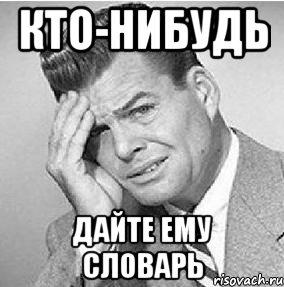

In [78]:
def bad_hash(word: str) -> str:
    return word[0].upper()


bad_hash("Технилище")

'Т'

In [79]:
dictionary = {}

for word in ["Технилище", "Бауманка", "Ракетный колледж на Яузе", "Бау", "Бмнк", "Универ"]:
    d = dictionary.get(bad_hash(word), [])
    d.append(word)
    dictionary[bad_hash(word)] = d
    
    
dictionary

{'Т': ['Технилище'],
 'Б': ['Бауманка', 'Бау', 'Бмнк'],
 'Р': ['Ракетный колледж на Яузе'],
 'У': ['Универ']}

## Хеш-таблицы


**Хеш-таблица** - это структура данных, использующая хеш-функции для хранения данных в виде пар ключ-значение. Основное преимущество хеш-таблиц заключается в быстром поиске, вставке и удалении элементов за время, близкое к O(1) в среднем случае (в идеальном случае).

В природе существует единственная структура данных, позволяющая получать элементы за константное время - это массив (при получении элементов по индексу). Поэтому в основе хеш-таблицы лежит массив.

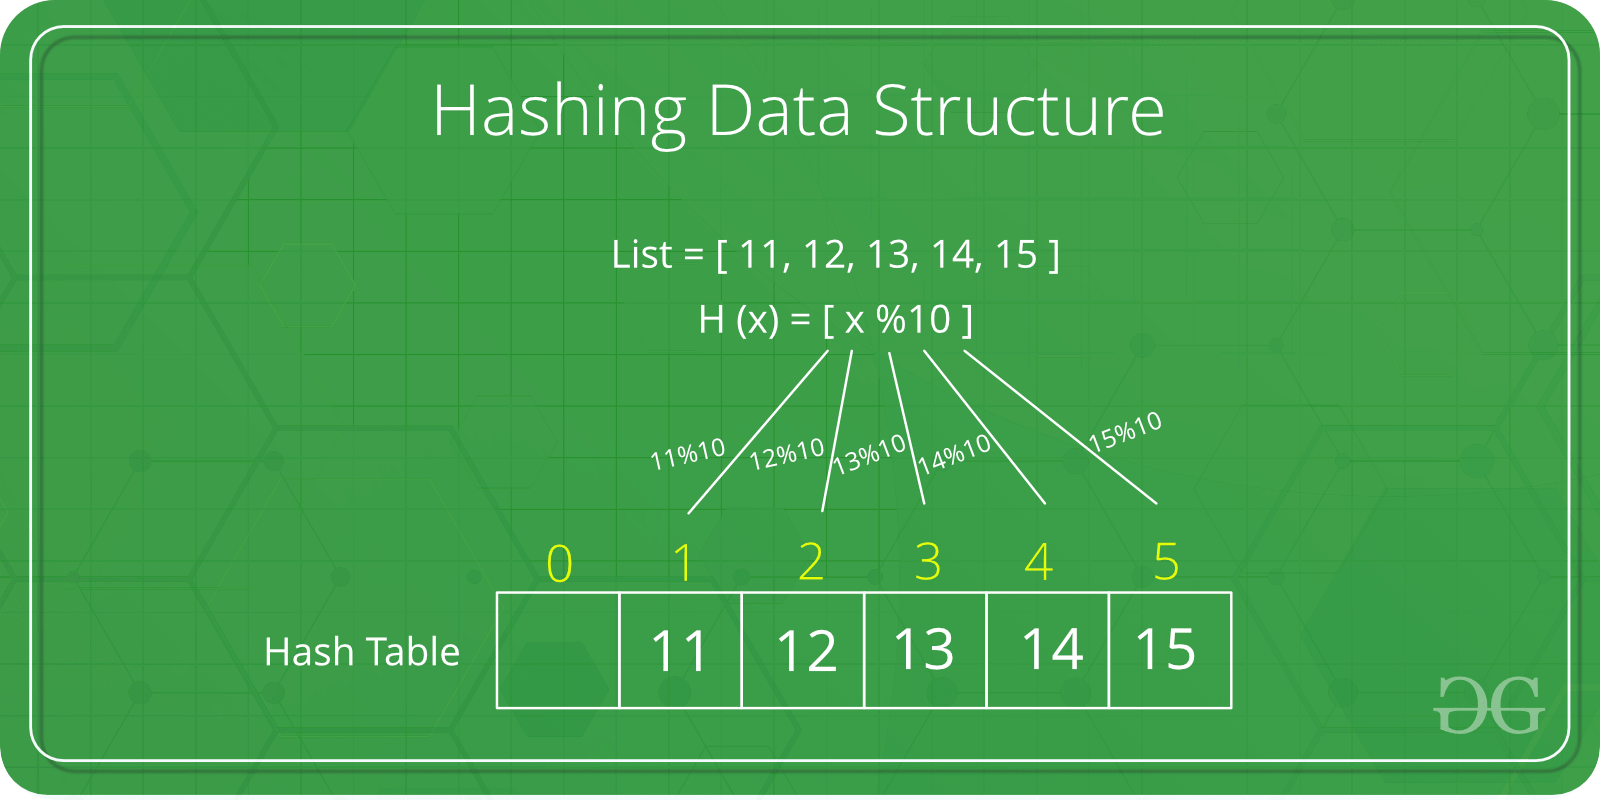

В примерах использования питоновской функции `hash` мы увидели, что область значений этой функции достаточно широкая. Прежде рассмотрим, как сузить ее в классических хеш-таблицах, а затем посмотрим на питоновскую реализацию.

Самый простой пример хеш-функции от числа с конечной областью значений - это остаток от деления.

### Вычисление хеш-функции делением

Поставим ограничение:

$$ \exists M > 0: 0 <= hash(x) < M $$

И реализуем простейшую хеш-функцию:

$$ hash(x) = x  mod  M $$

В качестве $ M $ хорошо брать достаточно большое простое число, далекое от числа-степени 2.

In [80]:
M = 104729

def int_hash(x: int) -> int:
    return x % M

print(int_hash(1000))
print(int_hash(32500))
print(int_hash(234234234))

1000
32500
60190


### Вычисление хеш-функции умножением

Другой вариант функции с ограниченной областью значений - умножение на некоторое дробное число.

Введем:

$$ M: hash(x) \in [0..M-1], $$

$$ A = \dfrac{s}{2^{32}}, $$

$$ s = 2654435769 $$

И тогда будем вычислять хеш-функцию:

$$ hash(x) = [M * \{x * A\}], $$

где `{}` - дробная часть, `[]` - целая часть

In [82]:
A = 2654435769 / (2**32)
A

0.6180339886341244

In [83]:
M = 2**15
A = 2654435769 / (2**32)

def int_hash_mul(x: int) -> int:
    return int(M * (x * A % 1))

print(int_hash_mul(1000))
print(int_hash_mul(32500))
print(int_hash_mul(234234234))

1113
3428
29939


### Вычисление хеш-функции от строк

$$ hash(s) = (s_0 + s_1a + s_2a^2 + ...) mod M $$

или

$$ hash(s) = (s_0a^{len(s)-1} + s_1a^{len(s)-2} + ... + s_{-2}a + s_{-1}) mod M  = ((((s_0a + s_1)a + s_2)a + ... + s_{-2})a + s_{-1}) mod M $$

`a` и `M` стоит выбирать взаимно простыми

In [84]:
a = 7919
M = 8192

def str_hash(s: str) -> int:
    result = 0
    for c in s:
        result = (result * a + ord(c)) % M
    return result


print(str_hash("Технилище"))
print(str_hash("технилище"))
print(str_hash("tехнилище"))

2326
6454
5736


### Свойства хорошей хеш-функции

- **Равномерное распределение**. Хеш-значения должны быть равномерно распределены по всему диапазону возможных значений.
- **Быстродействие**. Функция должна работать быстро, даже на больших объемах данных.
- **Уникальность**. Два различных набора данных не должны давать одинаковое хеш-значение (иначе происходят коллизии).
- **Изменения входных данных должны влиять на хеш**. Даже небольшие изменения во входных данных должны приводить к значительным изменениям в хеше.

## Коллизии хеш-таблицы

Вернемся к первой хеш-функции для чисел. Здесь несложно придумать разные входные данные, дающие один и тот же результат.

In [85]:
M = 104729

def int_hash(x: int) -> int:
    return x % M

print(int_hash(1000))
print(int_hash((M+1) * 1000))

1000
1000


Да и для стандартной питоновской функции хеша можно подобрать коллизии:

In [86]:
magic_number = 2 ** 61 - 1

hash(magic_number)

0

In [87]:
hash(magic_number * 2)

0

In [88]:
hash(magic_number * 15)

0

При заполнении хеш-таблицы такая ситуация называется **коллизией**. А сохранить нужно оба значения. Есть два основных способа решения коллизий:

1. Метод цепочек
2. Открытая адресация

### Метод цепочек

Здесь всё просто: в каждом элементе массива-хеш-таблицы храним не одно значение, а связный список тех значений, которые попадают в эту коллизию.

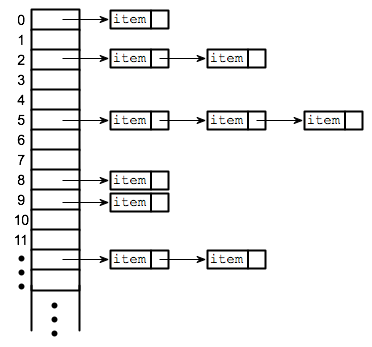

Сложности операций по времени:

- **Вставка элемента**: лучший случай - O(1), худший при проверке на дубли - O(N)
- **Поиск элемента**: лучший случай - O(1), худший - O(N)
- **Удаление элемента**: лучший случай - O(1), худший - O(N)

Среднее время работы всех этих операций: $ O(1 + \alpha) $, где $ \alpha $ - коэффициент заполненности таблицы (отношение количества заполненных элементов к длине массива).

### Открытая адресация

А тут еще проще. Если ячейка массива занята, то новый элемент вставляем просто в следующую по порядку (либо в следующую по более сложной формуле).

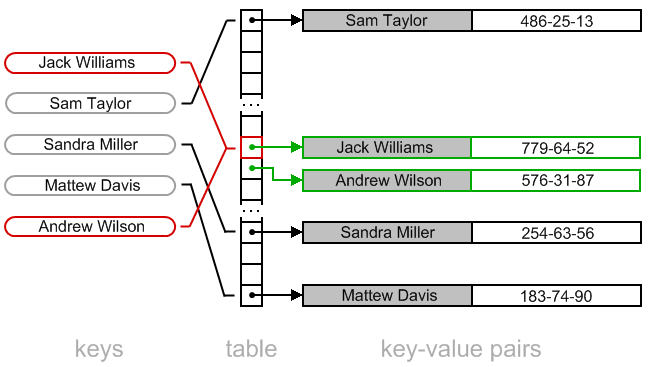

Сложности операций по времени:

- Для всех операций в среднем: $ O(\dfrac{1}{1-\alpha}) $
- Худший и лучший случаи совпадают с методом цепочек.

### Перехеширование

Если у нас уже достаточно много значений в хеш-таблице, есть смысл ее перестроить в таблицу большего размера. Для этого создается новая таблица и последовательно вставляются туда все значения из старой.

## Словари в питоне

Мы уже убедились в том, что хеши от произвольных объектов в питоне могут быть очень разными, а хранить словарь нужно в плотном массиве данных. По умолчанию размер массива пустого словаря - 8, а дальше он увеличивается при достижении определенного коэффициента заполняемости:

In [89]:
import sys

d = {}
sys.getsizeof(d)

64

In [90]:
for i in range(26):
    d[i] = i
    print(f"Размер словаря из\t{i+1}\tэлементов:\t{sys.getsizeof(d)}")

Размер словаря из	1	элементов:	232
Размер словаря из	2	элементов:	232
Размер словаря из	3	элементов:	232
Размер словаря из	4	элементов:	232
Размер словаря из	5	элементов:	232
Размер словаря из	6	элементов:	360
Размер словаря из	7	элементов:	360
Размер словаря из	8	элементов:	360
Размер словаря из	9	элементов:	360
Размер словаря из	10	элементов:	360
Размер словаря из	11	элементов:	640
Размер словаря из	12	элементов:	640
Размер словаря из	13	элементов:	640
Размер словаря из	14	элементов:	640
Размер словаря из	15	элементов:	640
Размер словаря из	16	элементов:	640
Размер словаря из	17	элементов:	640
Размер словаря из	18	элементов:	640
Размер словаря из	19	элементов:	640
Размер словаря из	20	элементов:	640
Размер словаря из	21	элементов:	640
Размер словаря из	22	элементов:	1176
Размер словаря из	23	элементов:	1176
Размер словаря из	24	элементов:	1176
Размер словаря из	25	элементов:	1176
Размер словаря из	26	элементов:	1176


Размер словаря явно меньше, чем чистые значения хешей:

In [91]:
hash('a')

-1799561511578272904

In [92]:
hash('b')

-5839754361219904470

Поэтому делаем тот самый трюк с остатком от деления - делим на размер массива. А используемый способ решения коллизий - открытая адресация.

In [93]:
hash('a') % 8

0

In [94]:
hash('b') % 8

2

In [95]:
hash('c') % 8

6

In [96]:
hash('d') % 8

6

In [97]:
hash('e') % 8

4

Пробирование в словарях идет не линейное, а по модифицированному квадратичному закону. Индексы пробирования для коллизии на индексе 3 получаются такие:

3 -> 11 -> 19 -> 29 -> 5 -> 6 -> 16 -> 31 -> 28 -> 13 -> 2

https://habr.com/ru/companies/otus/articles/448350/

Поскольку в словаре возможны коллизии, то при поиске элемента (который происходит и при вставке, и при удалении элементов) нужно сравнить и само значение ключа. Для этого в массиве хранятся не просто ключи, а вот такая сишная структура:

In [ ]:
typedef struct {
    Py_ssize_t me_hash;  // полный хеш ключа
    PyObject *me_key;    // указатель на объект-ключ
    PyObject *me_value;  // указатель на объект-значение
} PyDictEntry;

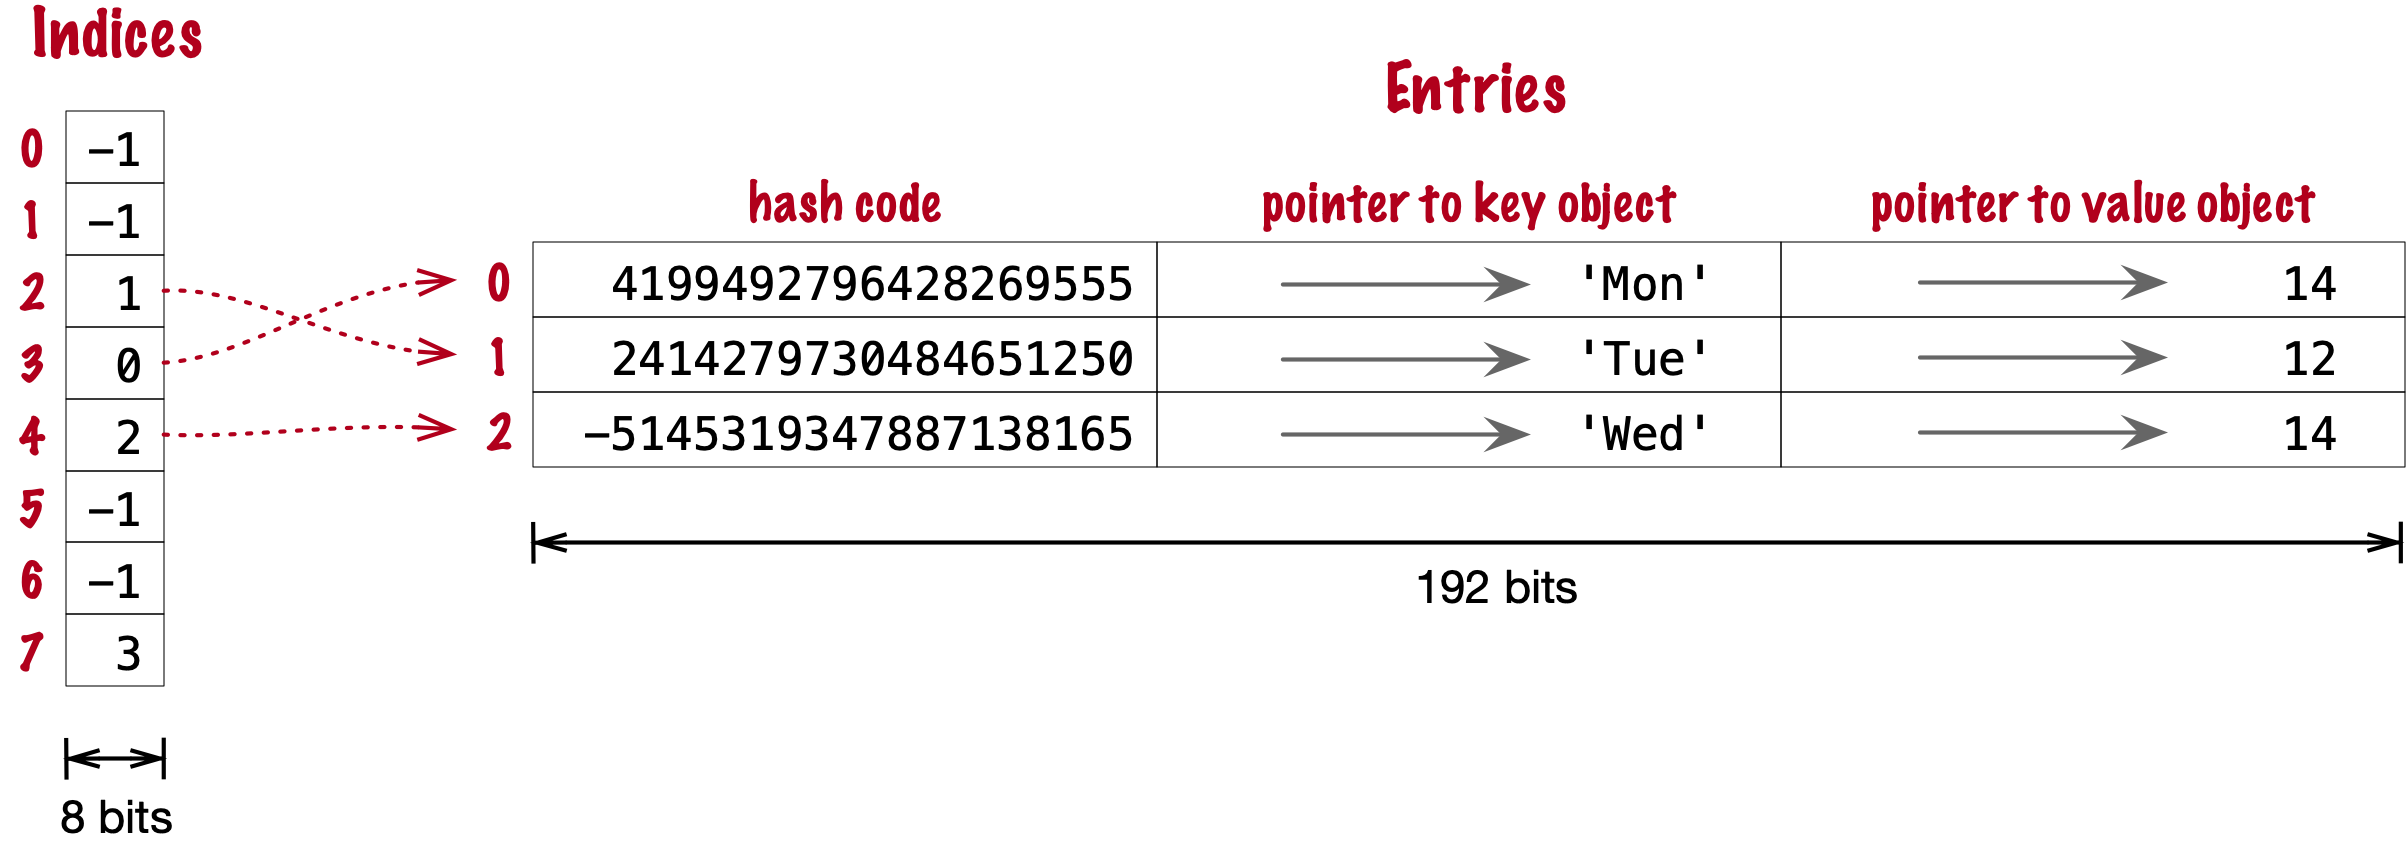

Стоит заметить, что операция удаления элемента не меняет размер массива:

In [98]:
for i in range(26):
    del d[i]
    
sys.getsizeof(d)

1176

А вот очистка встроенным методом - реально чистит.

In [99]:
d.clear()
sys.getsizeof(d)

64

# Криптографические хеш-функции

Хеш-функции могут быть реализованы по-разному в зависимости от области их применения. Выше мы рассматривали алгоритмы хеширования для ускорения поиска. Другая большая область применения хеширования - это криптография. Сюда входят, например, алгоритмы шифрования-дешифрования, проверки электронной подписи и блокчейна.

В этих алгоритмах используется **асимметричное шифрование**, в котором у пользователя есть два связанных друг с другом ключа: один приватный, который нельзя светить миру, и второй публичный, используя который любой другой пользователь может подтвердить личность того пользователя.

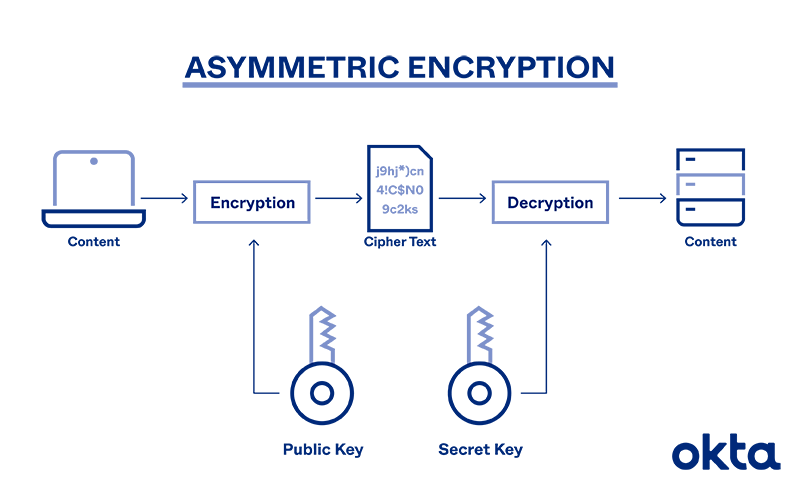

### Электронная подпись

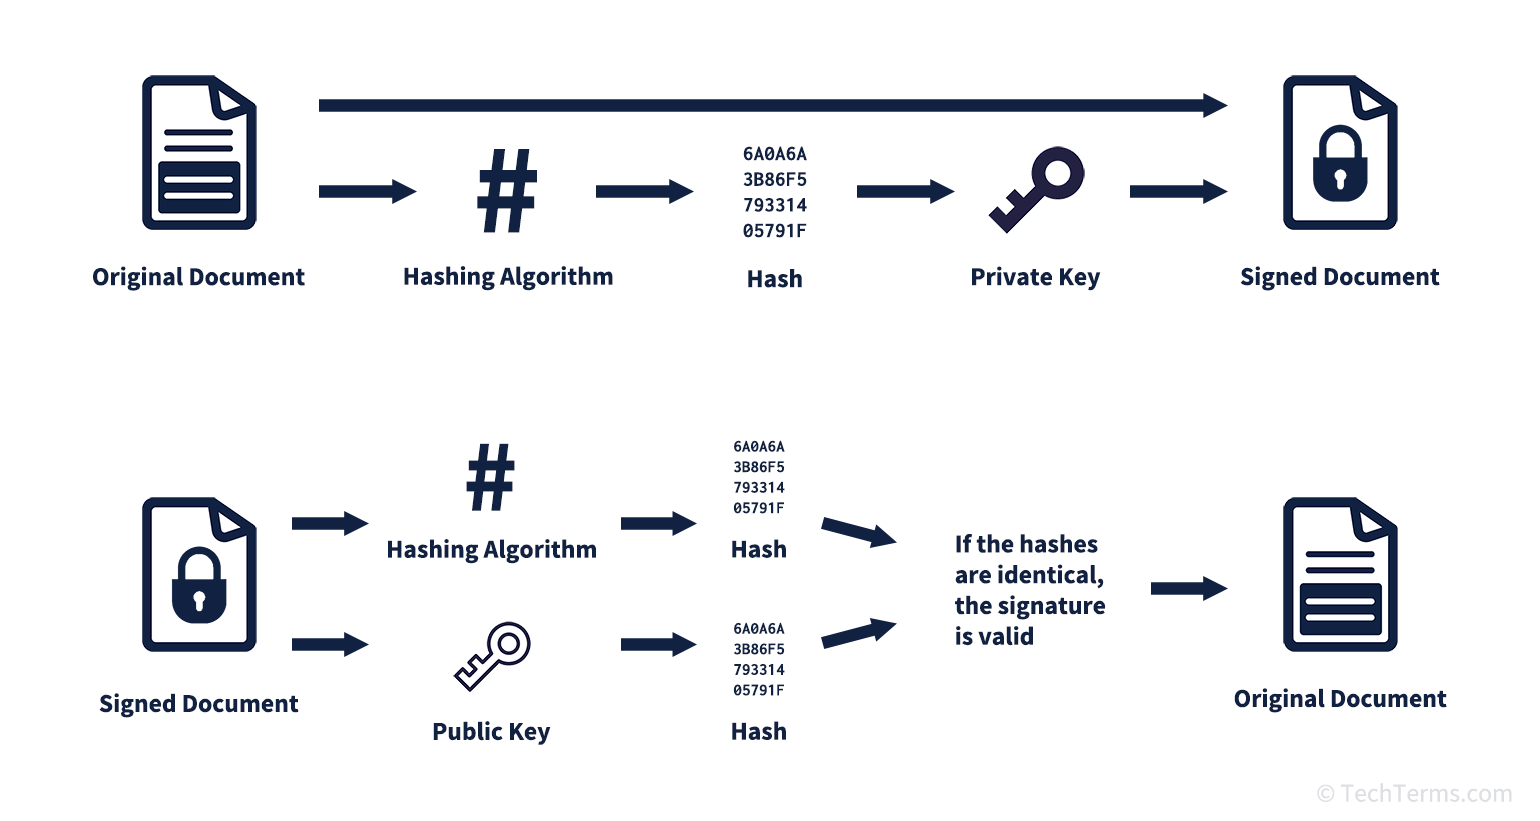

### Блокчейн

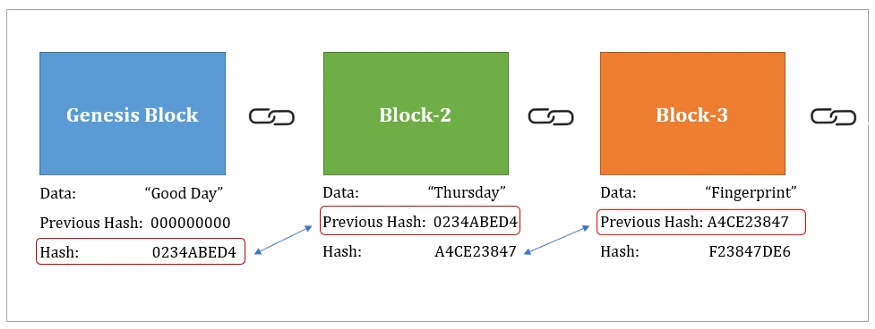